<a href="https://colab.research.google.com/github/venidaydream/Intro_to_Big_Data/blob/main/big_data_3_entrega_IBEX35.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Considerando la información siguiente  para el IBEX 35, seleccione 5 stocks y rango amplio de fechas en que hayan cotizado los 5 y haga el análisis descriptivo.


- que conclusión a nivel financiero se obtiene de cada stock?

- Busque en internet como hacer la matriz de correlación de los precios de los 5 stocks. (mapa de calor)

- Seleccione 3 stocks con los que formaría una cartera y justifique porque esa selección.

In [91]:
import pandas as pd
import datetime
import yfinance as yf

# ACCIONA, SOLARIA ENERGIA, AENA, CAIXABANK, BBVA
symbol = ['ACXIF','SEYMF','ANNSF','CIXPF','BBVXF']
stocks = yf.download(symbol)
stocks_adj = stocks['Adj Close']
for columna in stocks_adj.columns:
    primer_indice_con_informacion = stocks_adj[columna].first_valid_index()
    ultimo_indice_no_nulo = stocks_adj[columna].last_valid_index()
    print(f"para '{columna}': inicia en  {primer_indice_con_informacion} y finaliza en {ultimo_indice_no_nulo}")

[*********************100%%**********************]  5 of 5 completed
para 'ACXIF': inicia en  2009-12-29 00:00:00 y finaliza en 2023-10-19 00:00:00
para 'ANNSF': inicia en  2015-05-04 00:00:00 y finaliza en 2023-10-20 00:00:00
para 'BBVXF': inicia en  2012-05-15 00:00:00 y finaliza en 2023-10-20 00:00:00
para 'CIXPF': inicia en  2009-09-10 00:00:00 y finaliza en 2023-10-19 00:00:00
para 'SEYMF': inicia en  2009-12-16 00:00:00 y finaliza en 2023-10-19 00:00:00


In [92]:
start_date = "2020-01-01"
end_date = "2023-01-01"

stocks1 = yf.download(symbol, start=start_date, end=end_date)
stocks_df2 = stocks1['Adj Close']
stocks_df2.head()

[*********************100%%**********************]  5 of 5 completed


,ACXIF,ANNSF,BBVXF,CIXPF,SEYMF
Date,,,,,
2020-01-02,91.582100,185.853622,4.484027,2.57951,1.66
2020-01-03,91.582100,183.131439,4.484027,2.57951,1.66
2020-01-06,91.582100,183.131439,4.459832,2.57951,1.66
2020-01-07,90.684242,183.131439,4.459832,2.57951,1.66
2020-01-08,90.684242,183.131439,4.459832,2.57951,1.66


**Volatilidad**

Calcular la volatilidad histórica de las acciones te ayudaría a comprender cuán fluctuantes han sido los precios. Esto es importante para la gestión de riesgos y para determinar la idoneidad de la inversión.

In [93]:
stocks_df2.agg(["mean","median","max","min","std","var"])

,ACXIF,ANNSF,BBVXF,CIXPF,SEYMF
mean,144.176251,145.445735,4.324050,2.506699,16.405424
median,152.697311,150.099678,4.490400,2.563236,18.500000
max,205.115280,188.227036,6.320000,3.659511,34.500000
min,77.656227,95.338982,2.078414,1.367059,1.660000
std,34.914715,20.454987,1.081467,0.550191,7.933713
var,1219.037310,418.406490,1.169571,0.302710,62.943809


In [94]:
stocks_df2.describe()

,ACXIF,ANNSF,BBVXF,CIXPF,SEYMF
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,144.176251,145.445735,4.324050,2.506699,16.405424
std,34.914715,20.454987,1.081467,0.550191,7.933713
min,77.656227,95.338982,2.078414,1.367059,1.660000
25%,107.128857,130.371204,3.718789,2.076988,15.150000
50%,152.697311,150.099678,4.490400,2.563236,18.500000
75%,172.052490,160.472504,5.212294,2.902112,20.379700
max,205.115280,188.227036,6.320000,3.659511,34.500000


In [95]:
print('tamaño de la base:',stocks_df2.shape,
      '\n MEDIDAS DE TENDENCIA CENTRAL',
     '\n media:',stocks_df2.mean(),
     '\n mediana:',stocks_df2.median(),
     '\n moda:\n',stocks_df2.mode(),
     )


tamaño de la base: (756, 5) 
 MEDIDAS DE TENDENCIA CENTRAL 
 media: ACXIF    144.176251
ANNSF    145.445735
BBVXF      4.324050
CIXPF      2.506699
SEYMF     16.405424
dtype: float64 
 mediana: ACXIF    152.697311
ANNSF    150.099678
BBVXF      4.490400
CIXPF      2.563236
SEYMF     18.500000
dtype: float64 
 moda:
         ACXIF       ANNSF     BBVXF     CIXPF  SEYMF
0  184.220764  181.348953  4.653834  2.221106   1.66


**Análisis de tendencias**

Un análisis inicial podría incluir la visualización de los precios históricos en un gráfico de líneas a lo largo del tiempo. Esto ayudaría a identificar tendencias generales, como si el precio de las acciones ha estado aumentando, disminuyendo o manteniéndose estable

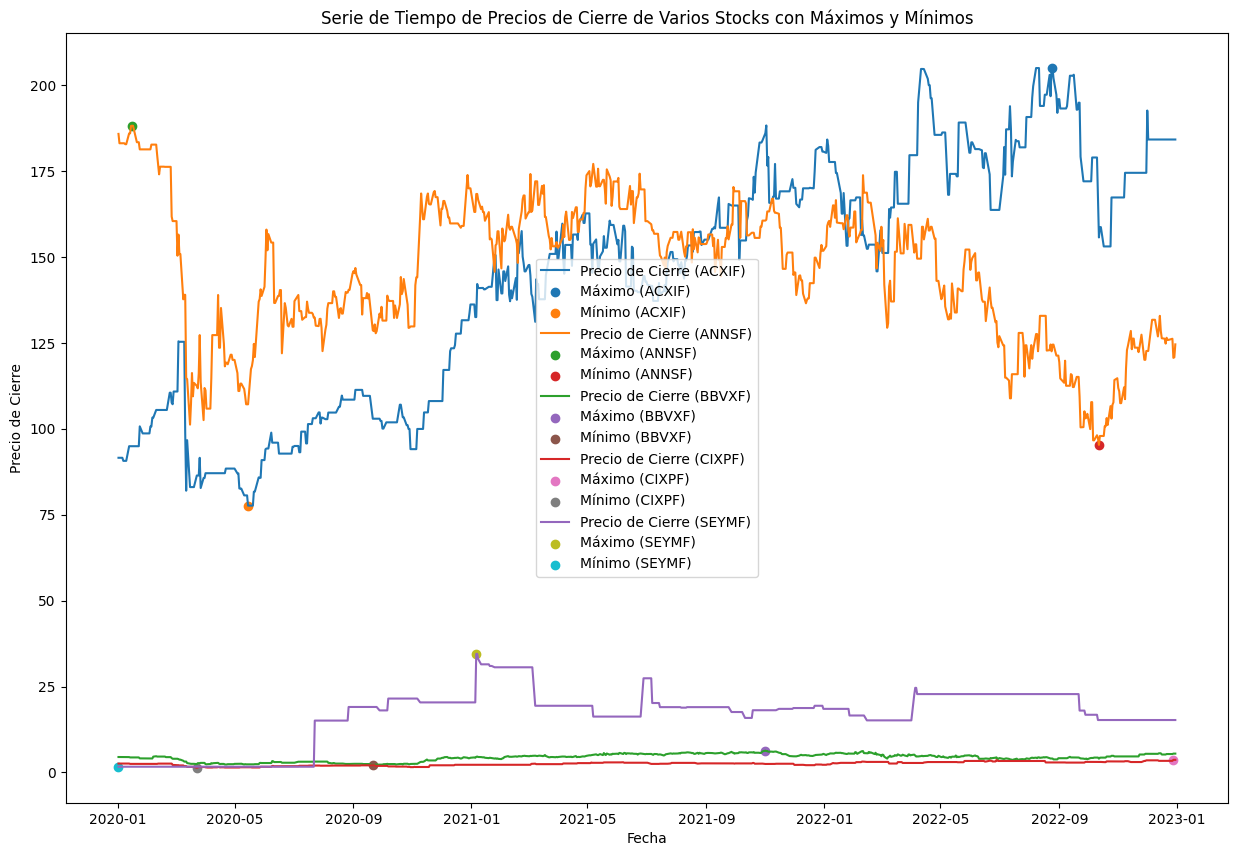

In [96]:
import matplotlib.pyplot as plt

# Tenemos 'stocks_df2' con las series de tiempo de varios stocks que denominamos data
# Cada clave es el nombre del stock y el valor es la serie de tiempo correspondiente

# Crear la gráfica de la serie de tiempo para cada stock
plt.figure(figsize=(15, 10))

for symbol, data in stocks_df2.items():
    plt.plot(data.index, data.values, label=f'Precio de Cierre ({symbol})')

    # Encontrar el máximo y mínimo de la serie de tiempo
    maximo = data.max()
    minimo = data.min()

    # Resaltar el máximo y mínimo en la gráfica
    plt.scatter(data.idxmax(), maximo, label=f'Máximo ({symbol})')
    plt.scatter(data.idxmin(), minimo, label=f'Mínimo ({symbol})')

# Configurar etiquetas y leyenda
plt.title('Serie de Tiempo de Precios de Cierre de Varios Stocks con Máximos y Mínimos')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre')
plt.legend()

# Mostrar la gráfica
plt.show()

**Detectar outliers**

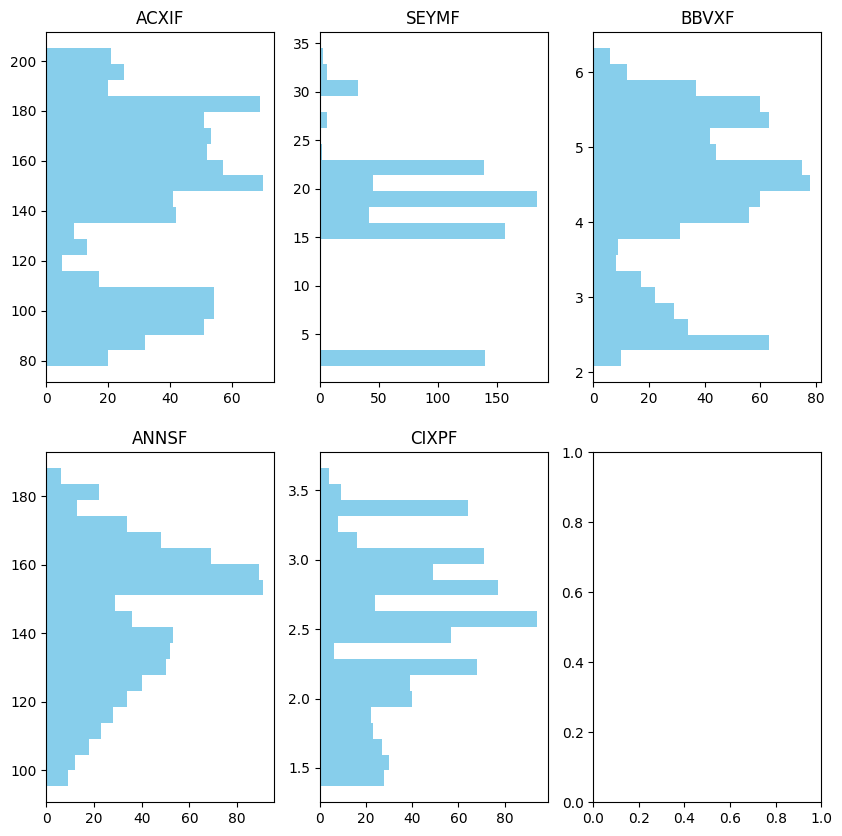

In [97]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 10))

#  symbol = ['ACXIF','SEYMF','ANNSF','CIXPF','BBVXF']
axes[0, 0].hist(stocks_df2['ACXIF'], bins=20, color='skyblue', orientation='horizontal')
axes[0, 0].set_title('ACXIF')

axes[0, 1].hist(stocks_df2['SEYMF'], bins=20, color='skyblue', orientation='horizontal')
axes[0, 1].set_title('SEYMF')

axes[1, 0].hist(stocks_df2['ANNSF'], bins=20, color='skyblue', orientation='horizontal')
axes[1, 0].set_title('ANNSF')

axes[1, 1].hist(stocks_df2['CIXPF'], bins=20, color='skyblue', orientation='horizontal')
axes[1, 1].set_title('CIXPF')

axes[0, 2].hist(stocks_df2['BBVXF'], bins=20, color='skyblue', orientation='horizontal')
axes[0, 2].set_title('BBVXF')

plt.show()

In [98]:
symbol = ['ACXIF','SEYMF','ANNSF','CIXPF','BBVXF']
for i in symbol:
    Q1 = stocks_df2[i].quantile(0.25)
    Q3 = stocks_df2[i].quantile(0.75)

    # Calcular el IQR (Rango Intercuartil)
    IQR = Q3 - Q1

    # Definir los límites superior e inferior para identificar outliers
    limite_superior = Q3 + 1.5 * IQR
    limite_inferior = Q1 - 1.5 * IQR

    # Filtrar los outliers
    datos_filtrados = stocks_df2[i][(stocks_df2[i]>= limite_inferior) & (stocks_df2[i] <= limite_superior)]
    datos_max = stocks_df2[i][ (stocks_df2[i] >= limite_superior)]
    datos_min = stocks_df2[i][(stocks_df2[i]<= limite_inferior)]


    print(f'Reporte para {i}: datos_filtrados:{datos_filtrados.shape}, y registros iniciales {stocks_df2[i].shape} con {datos_max.shape} outliers superiores y {datos_min.shape} outliers inferiores')

Reporte para ACXIF: datos_filtrados:(756,), y registros iniciales (756,) con (0,) outliers superiores y (0,) outliers inferiores
Reporte para SEYMF: datos_filtrados:(575,), y registros iniciales (756,) con (41,) outliers superiores y (140,) outliers inferiores
Reporte para ANNSF: datos_filtrados:(756,), y registros iniciales (756,) con (0,) outliers superiores y (0,) outliers inferiores
Reporte para CIXPF: datos_filtrados:(756,), y registros iniciales (756,) con (0,) outliers superiores y (0,) outliers inferiores
Reporte para BBVXF: datos_filtrados:(756,), y registros iniciales (756,) con (0,) outliers superiores y (0,) outliers inferiores


**Encontrar los splits**

In [99]:
# Definir los símbolos de las acciones
symbol = ['ACXIF','SEYMF','ANNSF','CIXPF','BBVXF']

# Crear un diccionario para almacenar información sobre los splits
splits_info = {}

# Iterar a través de los símbolos y obtener información sobre los splits
for i in symbol:
    stock = yf.Ticker(i)
    splits = stock.splits
    splits_info[i] = splits

# Imprimir información sobre los splits
for symbol, splits in splits_info.items():
    print(f"Splits para {symbol}:")
    print(splits)



Splits para ACXIF:
Series([], Name: Stock Splits, dtype: float64)
Splits para SEYMF:
Series([], Name: Stock Splits, dtype: float64)
Splits para ANNSF:
Series([], Name: Stock Splits, dtype: float64)
Splits para CIXPF:
Series([], Name: Stock Splits, dtype: float64)
Splits para BBVXF:
Date
2014-03-31 00:00:00-04:00    1.019
2014-09-29 00:00:00-04:00    1.008
2014-12-22 00:00:00-05:00    1.010
Name: Stock Splits, dtype: float64


**Seleccionar el dia del split**

 De mi seleccion de acciones solo BBVA ha tenido stock split y siempre en 2014

In [100]:
stocks_adj.tail()

,ACXIF,ANNSF,BBVXF,CIXPF,SEYMF
Date,,,,,
2023-10-16,123.070000,147.050003,8.460,4.0558,17.0
2023-10-17,122.360001,145.449997,8.460,4.0558,17.0
2023-10-18,122.360001,147.949997,8.460,4.0558,17.0
2023-10-19,122.360001,147.574997,8.460,4.0581,17.0
2023-10-20,NaN,145.800003,8.165,NaN,NaN


In [101]:
split1 = stocks[(stocks.index.day == 31)& (stocks.index.month == 3) & (stocks.index.year == 2014)  ]
print(split1)
#split1.xs('BBVXF', level=0, axis=0)

            Adj Close                                       Close        \
                ACXIF ANNSF     BBVXF     CIXPF  SEYMF      ACXIF ANNSF   
Date                                                                      
2014-03-31  64.697884   NaN  7.875503  4.005471  1.865  86.699997   NaN   

                                    ...   Open                                \
                BBVXF CIXPF  SEYMF  ...  ACXIF ANNSF      BBVXF CIXPF  SEYMF   
Date                                ...                                        
2014-03-31  11.993164  6.18  1.865  ...  86.68   NaN  11.993164  6.18  1.865   

           Volume                          
            ACXIF ANNSF BBVXF CIXPF SEYMF  
Date                                       
2014-03-31  100.0   NaN   0.0   0.0   0.0  

[1 rows x 30 columns]


In [102]:
split1.xs('BBVXF', level=1, axis=1)

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2014-03-31,7.875503,11.993164,11.993164,11.993164,11.993164,0.0


**Seleccionar un rango de fechas ('BBVA')**

Como era el precio del stock unos dias antes y unos despues del split?

In [103]:
fecha = pd.to_datetime('2014-03-31')

inicio = fecha - pd.DateOffset(4)
fin = fecha + pd.DateOffset(3)

# Utilizar selección para filtrar el rango de fechas
datos_seleccionados = stocks.loc[inicio:fin]
datos_seleccionados.xs('BBVXF', level=1, axis=1)

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2014-03-27,7.731577,12.000885,12.000885,12.000885,12.000885,0.0
2014-03-28,7.731577,12.000885,12.000885,12.000885,12.000885,0.0
2014-03-31,7.875503,11.993164,11.993164,11.993164,11.993164,0.0
2014-04-01,8.030306,12.228901,12.228901,12.228901,12.228901,0.0
2014-04-02,8.030306,12.228901,12.228901,12.228901,12.228901,0.0
2014-04-03,8.030306,12.228901,12.228901,12.228901,12.228901,0.0


**Estacionalidad**

La estacionalidad se refiere a patrones recurrentes que ocurren en un ciclo fijo de tiempo, como las estaciones del año o los meses del año.

Prueba de Dickey-Fuller Aumentada (ADF): Esta prueba se utiliza para evaluar si una serie de tiempo es estacionaria en el sentido de que no tiene una raíz unitaria. Si se rechaza la hipótesis nula en la prueba ADF, sugiere que la serie de tiempo es estacionaria.

Ho: la serie no es estacionaria

H1: la serie es estacionaria

In [104]:
import numpy as np
import pandas as pd
import statsmodels.api as sm


symbol = ['ACXIF','SEYMF','ANNSF','CIXPF','BBVXF']

for i in symbol:
    # Crear la serie de tiempo
    stock=stocks_df2[i]
    serie_temporal = pd.Series(stock)

    # Realizar la prueba ADF
    resultado_adf = sm.tsa.adfuller(serie_temporal)
    # Extraer los resultados de la prueba ADF
    adf_estadística, p_valor, lags, nobs, valores_críticos, regresión_estimada = resultado_adf
    # Imprimir los resultados
    print(f'Valor p:de {i}: {p_valor}')

Valor p:de ACXIF: 0.6333670345530535
Valor p:de SEYMF: 0.17279678622617622
Valor p:de ANNSF: 0.08542514214715868
Valor p:de CIXPF: 0.7413404188660662
Valor p:de BBVXF: 0.5269145219433841
